# Partial Derivatives, Advanced Plotting and Contour Plots

## Preliminary Mathematics

$$
f(x,y) := \text{ A map, from $\mathbb{R}^{2} \rightarrow \mathbb{R}$ } 
$$

i.e. If you the function $f$ two numbers in your domain ($\mathbb{R}^{2}$) it will map it to a single value (in $\mathbb{R}$).

This can be represented with a 3D graph, where each point in the $xy$-plane is associated with a point along the $z$-axis.

e.g.

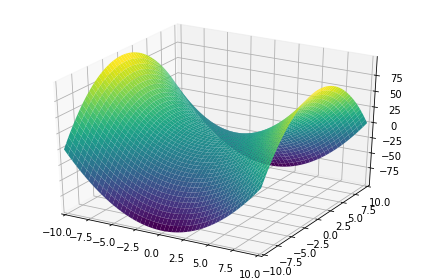

In [4]:
# Access necessary functions.
import sympy as sp 

# Create variables
x = sp.Symbol('x')
y = sp.Symbol('y')

# Create plot
sp.plotting.plot3d(x**2 - y**2)

# Question 1:

(a) Read the code below. What is an attempting to do?

(b) Run the code below. It will produce an error. Interpret it and fix the code so that a plot is produced.

# Answer 1:

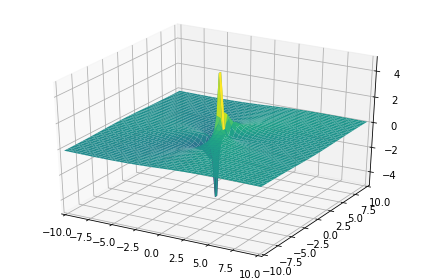

In [26]:
import sympy as sp
from sympy.plotting import plot3d

x = sp.Symbol('x')
y = sp.Symbol('y')
f = (x**2 - y**2)/(x**2 + y**2)

plot3d(sp.diff(f,x))

# Plotting Multivariable Functions

## Symbolic Plotting

The function used for symbolic plotting with `sympy` is `plot3d` but it is nested within the sub-module `sympy.plotting`. 

You can import it as such:

In [9]:
from sympy.plotting import plot3d

The algorithm for producing the plot is as follows:

1. Import the plotting function.
2. Specify the symbols in the function (the variables $x$ and $y$, most likely.
3. Create function with variables.
4. Call plot with the argument being the function.

e.g.

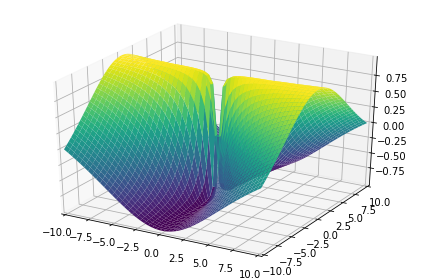

In [10]:
# Access necessary functions.
import sympy as sp
from sympy.plotting import plot3d as plot3d

# Create variables
x = sp.Symbol('x')
y = sp.Symbol('y')

# Create function
func = (x**2 - y**2)/(x**2 + y**2)

# Create plot
plot3d(func)

# Question 2:

(a) Create symbolic plots of the following:

> (i) $$f(x,y) = \frac{\left(x^{2}+y^{2}\right)}{\left(x^{2}-y^{2}\right)}$$
> 
> (ii) $$f(x,y) = y^{3}+x^{3}$$
> 
> (iii) $$f(x,y) = xy(y^{2}-x^{2})$$

(b) Symbolically calculate all the partial derivatives of these functions.



## Numeric Plotting

Producing a plot with points is a little more involved when the dimensions of the domain increases.

Before, we simply had to make an array of `x` and then run it through a function, then plot it. Now, we have to develop a grid of points. This may not be completely obvious.

But it is best explained graphically.

![](dots_domain.png)

The domain is now a grid of points, each point in that grid must be mapped through $f(x,y)$ and for that to happen, all points in the grid must be available to call the function on.



Let's consider:

$$
f(x,y) = \sin\left(\frac{x+y}{2}\right) + 2
$$

For the domain:

$$
x \in  [-5,5] \quad
y \in  [-5,5]
$$

[]

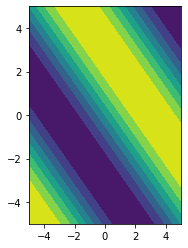

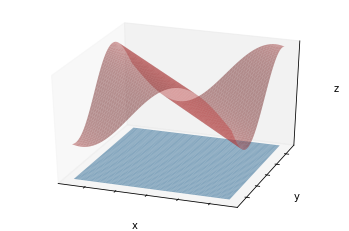

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1)
x = np.linspace(-5,5)
y = np.linspace(-5,5)

# Create our grid of points
xv, yv = np.meshgrid(x,y)
ax = plt.subplot(1,2,1)

# Make a contour plot that is filled with color.
ax.contourf(xv,yv, np.sin(0.5*xv+0.5*yv) + 2)


# Make a second figure and make it 3D
fig = plt.figure(2)
ax = fig.gca(projection='3d')

# Make a zero vector to plot the domain of the function
zv, zvv = np.meshgrid(np.zeros(50), np.zeros(50))

# Plot the domain
ax.plot_surface(xv,yv,zv, alpha = 0.5)

# Make and plot our actual function listed above
f = np.sin(0.5*xv+0.5*yv) + 2
ax.plot_surface(xv,yv,f, color="#CC4444", alpha=0.5)

# Change viewing angle
ax.view_init(30,110)

# Label our axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Make it pretty
ax.grid(False)
# Turn off numbers on axes
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticks([])



# Question 3:

What is the purpose of `alpha`?

# Answer 3:

## So what are the steps for 3D plotting?

### 1. Make your x-domain.

In [ ]:
import numpy as np
a = 2; b = 4
x = np.linspace(a,b)
display(x)

### 2. Make your y-domain.

In [ ]:
c = 9; d = 11
y = np.linspace(c,d)
display(y)

### 3. Create 2D versions of x and y with `np.meshgrid()`

In [13]:
xv, yv = np.meshgrid(x,y)
display(xv)
display(yv)

array([[-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       ...,
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ]])

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.79591837, -4.79591837, -4.79591837, ..., -4.79591837,
        -4.79591837, -4.79591837],
       [-4.59183673, -4.59183673, -4.59183673, ..., -4.59183673,
        -4.59183673, -4.59183673],
       ...,
       [ 4.59183673,  4.59183673,  4.59183673, ...,  4.59183673,
         4.59183673,  4.59183673],
       [ 4.79591837,  4.79591837,  4.79591837, ...,  4.79591837,
         4.79591837,  4.79591837],
       [ 5.        ,  5.        ,  5.        , ...,  5.        ,
         5.        ,  5.        ]])

### 4. Create your function using your newly made `xv` and `yv` variables

Let's do a fun one!

$$
f(x,y) =\frac{1}{x-3} + \frac{1}{y-10}
$$



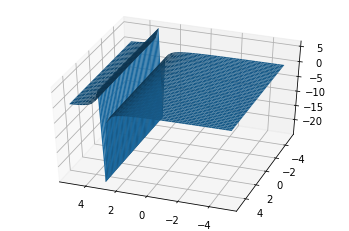

In [14]:
import matplotlib.pyplot as plt


# Make the function 
zv = 1/(xv - 3) + 1/(yv - 10)

# Make a 3D figure
fig = plt.figure()
ax = fig.gca(projection="3d")

# Plot the surface and change the viewing angle.
ax.plot_surface(xv,yv,zv)
ax.view_init(40,110) # Change the angle of viewing.

# Question 4:

For the domains:

$$
x \in  [-10,10] \quad
y \in  [-10,10]
$$

### Functions:

> (i) $xy$
> 
> (ii) $-xy$
> 
> (iii) $x^2 + y^2 + z^2 = 0$
> 
> (iv) $3\sin(\frac{x + y}{5}) + 6$
> 
> (v) $\cos(x) + \sin(y)$

(a) Calculate all partial derivatives of all functions.

(b) Produce individual plots using `matplotlib` for the following equations and superimpose its derivatives on the same plots.

# Answer 4:

(80, 81) (80, 81)


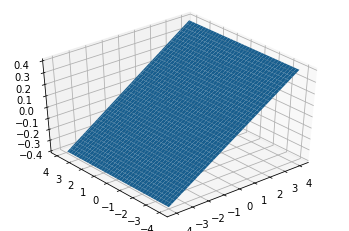

In [66]:
fv=xv*yv
dfx = np.diff(fv,axis=0)


fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(xv[:-1],yv[:-1],dfx)


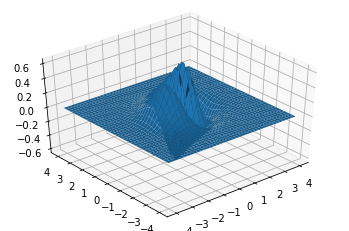

In [57]:
x = sp.Symbol('x')
y = sp.Symbol('y')
f = sp.exp(-x**2-y**2)*(x**2+x*y+y**2)

fnp=sp.lambdify([x,y],sp.diff(f,x), "numpy")
xv, yv = np.meshgrid(np.linspace(-4,4,81),np.linspace(-4,4,81))


# Make a 3D figure
fig = plt.figure()
ax = fig.gca(projection="3d")

# Plot the surface and change the viewing angle.
ax.plot_surface(xv,yv,fnp(xv,yv))
ax.view_init(40,230) # Change the angle of viewing.

# Demonstrating that $f_{xy} = f_{yx}$

One of the key things to understand about partial derivatives is that it does not affect your result if you differentiate in a different sequence. This theorem has a few names, but one of the most common is **Schwarz' Theorem**.

$$
\frac{\partial^{2} f}{\partial y \ \partial x} =
\frac{\partial^{2} f}{\partial x \ \partial y} 
$$

We can demonstrate this with `sympy`.

# Question 5:

Using the code below, demonstrate that the function $f$ has equivalent mixed derivatives.

Requirements:
1. You should evaluate both cases and save them into separate variables.
2. Write an if-statement that compares them and prints `"They're the same!"` if true.

# Answer 5:

In [ ]:
import sympy as sp
x = sp.Symbol('x')
y = sp.Symbol('y')
f = sp.Function('f')(x,y)

# Your code here

# Contour Plotting

# Question 6:

With our `matplotlib` plotting of the function 

$$
f(x,y) = \sin\left(\frac{x+y}{2}\right) + 2
$$

we produced a `contour` plot (above). Take this example and modify it to produce contour plots of the following functions:

(a) $x^2 + 4y^2$

(b) $(x-1)^2 + y^2$

# Answer 6: